#**Data Cleaning**


Pandas Pipeline
1.   Impor the data.
2.   Set the data types. (as function)
3.   Remove the outlier. (as function)





```
df.pipe(set_type).pipe(remove_out, min_row_country=10)
```



In [140]:
# import libraries
import pandas as pd
import numpy as np

# load data
# This code is made to load our data stored on Google Drive
def gd_path(file_id):
    """Generate a shareable link from Google Drive file id."""
    return f"https://drive.google.com/uc?export=download&id={file_id}"

csv_names = ['products', 'orders', 'orderlines', 'brands']

# Google Drive file ids


files_id = {
    'products':"1afxwDXfl-7cQ_qLwyDitfcCx3u7WMvkU",
    'orders':"1Vu0q91qZw6lqhIqbjoXYvYAQTmVHh6uZ",
    'orderlines':"1FYhN_2AzTBFuWcfHaRuKcuCE6CWXsWtG",
    'brands':"1m1ThDDIYRTTii-rqM5SEQjJ8McidJskD" 
} 

# Read data from Google Drive
products = pd.read_csv(gd_path(files_id['products']), sep=",")
orders = pd.read_csv(gd_path(files_id['orders']), sep=",")
orderlines = pd.read_csv(gd_path(files_id['orderlines']), sep=",")
brands = pd.read_csv(gd_path(files_id['brands']), sep=",")

In [141]:
# Form
pd.set_option('display.max_rows', 1000)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Functions

In [231]:
def start_pipeline(dataf):
    return dataf.copy()

def remove_dup(dataf):
    return dataf.drop_duplicates()

def check(df, operator, column_name, length_of_element,):
    if operator == len:  # Call with attribute len for lenght 
      i = '.'   
    else: 
      i = '\.'          # Call with attribute '' for dot count 
    return df[column_name].str.count(i).eq(length_of_element).sum() 

def transform(df, column, new_column):    # After analysing the price in PRODUCTS, some patterns were applied 
    df[new_column] = (
        df[column].loc[df[column].notna() &
                       (df[column].str.match(r'^\d{1,4}\.\d{1,3}$') | df[column].str.match(r'^\d{1,5}$'))].astype(float)
        .combine_first(df[column].loc[df[column].notna() &
                                      df[column].str.match(r'^\d{3}\.\d{3}$')].astype(float) / 10)
        .combine_first(df[column].loc[df[column].notna() &
                                      df[column].str.match(r'^\d{1,3}\.\d{3}\.\d{3}$')].str.replace(".", "", regex=False).astype(float) / 100000)
    )
    return df

def transform_OL(df, column, new_column):    # After analysing the unti_pruce ORDERLINES, some patterns were applied 
    df[new_column] = (
        df[column].loc[df[column].notna() &
                       (df[column].str.match(r'^\d{1,4}\.\d{2}$'))].astype(float)
        .combine_first(df[column].loc[df[column].notna() &
                                      df[column].str.match(r'^\d{1,3}\.\d{3}\.\d{2}$')].str.replace(".", "", regex=False).astype(float)/100)
    )
    return df


def analyze_prices(products_df, price_column):
    case1_counts = (products_df[price_column].notna() & products_df[price_column].str.match(r'^\d{1,3}\.\d{3}\.\d{3}$')).value_counts(normalize=True)
    print("CASE 1: \d{1,3}\.\d{3}\.\d{3}")
    print(case1_counts)

    case2_counts = (products_df[price_column].notna() & products_df[price_column].str.match(r'^\d{3}\.\d{3}$')).value_counts(normalize=True)
    print("CASE 2: \d{3}\.\d{3}")
    print(case2_counts)

    case3_counts = (products_df[price_column].notna() & products_df[price_column].str.match(r'^\d{1,4}\.\d{1,3}$')).value_counts(normalize=True)
    print("CASE 3: \d{1,4}\.\d{1,3}")
    print(case3_counts)

    case4_counts = (products_df[price_column].notna() & products_df[price_column].str.match(r'^\d{1,5}$')).value_counts(normalize=True)
    print("CASE 4: \d{1,5}")
    print(case4_counts)

    na_counts = products_df[price_column].isna().value_counts(normalize=True)
    print("CASE Na")
    print(na_counts)

# Remove "porducts_1sp" !!!
def case_price(column, lenght, dots_count):
  return products_1sp[(products_1sp[column].str.count('.').eq(lenght)) & (products_1sp[column].str.count('\.').eq(dots_count))]

# 1 Products [non ok]

**products.csv**
* `sku` – stock keeping unit: a unique identifier for each product
* `name` – product name
* `desc` – product description
* `in_stock` – whether or not the product was in stock at the moment of the data extraction
* `type` – a numerical code for product type

In [142]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19326 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          19326 non-null  object
 1   name         19326 non-null  object
 2   desc         19319 non-null  object
 3   price        19280 non-null  object
 4   promo_price  19326 non-null  object
 5   in_stock     19326 non-null  int64 
 6   type         19276 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.0+ MB


### Preprocessing 
Check the size and drop duplicates.

In [144]:
products.nunique(), products.shape

(sku            10579
 name           10373
 desc            7098
 price           2690
 promo_price     4614
 in_stock           2
 type             126
 dtype: int64,
 (19326, 7))

In [145]:
products_1sp = products.pipe(start_pipeline).pipe(remove_dup)

#### **`price` analyses**

In [146]:
pd.set_option('display.max_colwidth', None) # Display full cell wight 

In [147]:
products_1sp[["name","price","promo_price"]].sample(5)

,name,price,promo_price
499,Mujjo Touchscreen Gloves iPhone iPad and iPod Gray (Size M / L),24.99,21.901
14893,"Tucano Nido Hard-Shell Case MacBook Pro 15 ""(Late 2016) Black",34.9,299.899
15527,Thule Atmos X3 iPhone Case 8 Plus / 7 Plus Orange,29.95,269.903
11458,Brown Marley Chant Mini Wireless Speaker,59.99,459.897
15812,Elago Airpod Charging stand Charging Stand White,19.95,13.99


In [148]:
products_1sp[products_1sp.price == products_1sp.promo_price].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 60 to 19306
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          204 non-null    object
 1   name         204 non-null    object
 2   desc         203 non-null    object
 3   price        204 non-null    object
 4   promo_price  204 non-null    object
 5   in_stock     204 non-null    int64 
 6   type         200 non-null    object
dtypes: int64(1), object(6)
memory usage: 12.8+ KB


In [103]:
products_1sp[products_1sp.price.str.count('.') != products_1sp.promo_price.str.count('.')].sample(5)

,sku,name,desc,price,promo_price,in_stock,type
14947,WAH0002-A,Open - Wahoo Fitness Blue HR heart rate monitor iPhone iPad and iPod,Wireless heart rate monitor iPhone iPad and iPod Touch.,79.99,39,0,11905404
18905,APP2375,"Apple Macbook Pro 13 ""Core i7 25GHz | 8GB | 256GB SSD Silver",New MacBook Pro 13-inch Core i7 25GHz with 8GB of RAM and 256GB PCIe SSD,2109,19.820.042,0,"1,02E+12"
14510,SPH0016,Sphero BB-8 Battle-Worn Force Band Bracelet + Star Wars Special Edition,Smart Force Band Bracelet with Bluetooth + control droid with a range of 25 m,229.99,1.699.905,0,11905404
19228,OTT0117-A,Open - Otterbox iPad Folio Symmetry Air 2 Black,Reconditioned protective cover sheet format for iPad Air 2.,99.99,531.254,0,12635403
3152,MOS0166,USB-C Moshi USB Adapter,C USB-USB adapter for MacBook 12 inches,32.9,199.904,0,12585395


In [168]:
# Investigate the cases
(
#CASE 1
    (products_1sp.price.notna() & 
     products_1sp.price.str.match(r'^\d{1,3}\.\d{3}\.\d{3}$'))
     .value_counts(normalize=True)
#CASE 2
   ,(products_1sp.price.notna() & 
      products_1sp.price.str.match(r'^\d{3}\.\d{3}$'))
     .value_counts(normalize=True)
#CASE 3
   ,(products_1sp.price.notna() & 
      products_1sp.price.str.match(r'^\d{1,4}\.\d{1,3}$'))  
     .value_counts(normalize=True)
#CASE 4
   ,(products_1sp.price.notna() & 
      products_1sp.price.str.match(r'^\d{1,5}$'))  
     .value_counts(normalize=True)
#Na
   ,products_1sp.price.isna().value_counts(normalize=True)
)

#too function

(False   0.96
 True    0.04
 Name: price, dtype: float64,
 False   0.99
 True    0.01
 Name: price, dtype: float64,
 True    0.66
 False   0.34
 Name: price, dtype: float64,
 False   0.70
 True    0.30
 Name: price, dtype: float64,
 False   1.00
 True    0.00
 Name: price, dtype: float64)

In [233]:
analyze_prices(products_1sp, "price")

CASE 1: \d{1,3}\.\d{3}\.\d{3}
False   0.96
True    0.04
Name: price, dtype: float64
CASE 2: \d{3}\.\d{3}
False   0.99
True    0.01
Name: price, dtype: float64
CASE 3: \d{1,4}\.\d{1,3}
True    0.66
False   0.34
Name: price, dtype: float64
CASE 4: \d{1,5}
False   0.70
True    0.30
Name: price, dtype: float64
CASE Na
False   1.00
True    0.00
Name: price, dtype: float64


#### **Clean by cases**

The columsn `price` and `prome_price` seem to have multiple mistake. 

Range of "." count ist 0-2.
Range of digits in a numer 1-11.

```
CASE 1
- 352.559.394 (10)   >  remove "." , float / 10000
-  12.808.289 (138)  >  remove "." , float / 10000
-   6.999.003 (229)  >  remove "." , float / 10000
	
r'^\d{1,3}\.\d{3}\.\d{3}$'

CASE 2	
-     164.923 (139) > float / 10 

r'^\d{3}\.\d{3}$'

CASE 3
-      91.989 (23)  > float
-       9.082 (3)   > float

-     679.99 > float
-      79.99 > float
-       9.99 > float
 
-    2117.5 (35) > float
-     119.9 (113)> float 
-      19.9 (347)> float
-       9.9 (11) > float 
       sum: 6941


r'^\d{1,4}\.\d{1,3}$'

CASE 4
- 11019 (42)   > float
-  2859 (1132) > float
-   209 (1112) > float
-    35        > float
-     9        > float 
     sum:3215

r'^\d{1,5}$'

```

##### CASE 4 and CASE 3

In [149]:
(
    products_1sp.loc[products_1sp.price.notna() &
                     (products_1sp.price.str.match(r'^\d{1,4}\.\d{1,3}$') | products_1sp.price.str.match(r'^\d{1,5}$'))]["price"].astype(float)
    .combine_first(products_1sp.loc[products_1sp.price.notna() &
                                    products_1sp.price.str.match(r'^\d{3}\.\d{3}$')]["price"].astype(float) / 10)
)

0       59.99
1       59.00
2       59.00
3       25.00
4       34.99
         ... 
19321   29.99
19322   69.95
19323   69.95
19324   69.95
19325   69.95
Name: price, Length: 10156, dtype: float64

##### CASE 2

In [107]:
(
products_1sp[products_1sp.price.notna() &
             products_1sp.price.str.match(r'^\d{3}\.\d{3}$')].price.sample(10).astype(float)/10
)

15362   39.99
13677   16.49
1866    34.99
18395   59.99
11291   54.00
15386   59.99
2399    39.99
15416   39.99
1924    29.30
15367   59.99
Name: price, dtype: float64

##### CASE 1

In [194]:
(
products_1sp[products_1sp.price.notna() &
             products_1sp.price.str.match(r'^\d{1,3}\.\d{3}\.\d{3}$')].price.str.replace(".","", regex=False).astype(float)/100000
).copy()   

(
products_1sp.isna().sum()
,products_1sp[["desc","price","type","cl_price"]].isna().value_counts(normalize=True)
)

(sku             0
 name            0
 desc            7
 price          46
 promo_price     0
 in_stock        0
 type           50
 cl_price       47
 dtype: int64,
 desc   price  type   cl_price
 False  False  False  False      0.99
               True   False      0.00
        True   False  True       0.00
 True   False  False  False      0.00
 False  False  False  True       0.00
 dtype: float64)

##### Apply all Cases

In [109]:
products_1sp["cl_price"] = (
products_1sp[products_1sp.price.notna() &
             products_1sp.price.str.match(r'^\d{1,4}\.\d{1,3}$')| products_1sp.price.str.match(r'^\d{1,5}$')].price.astype(float).
combine_first(products_1sp[products_1sp.price.notna() &
             products_1sp.price.str.match(r'^\d{3}\.\d{3}$')].price.astype(float)/10).
combine_first(products_1sp[products_1sp.price.notna() &
             products_1sp.price.str.match(r'^\d{1,3}\.\d{3}\.\d{3}$')].price.str.replace(".","", regex=False).astype(float)/100000)
)

# As def in functions 

(count   10476.00
 mean      646.07
 std      1336.52
 min         2.99
 25%        44.95
 50%       109.99
 75%       601.32
 max     15339.00
 Name: cl_price, dtype: float64,
 <Axes: >)

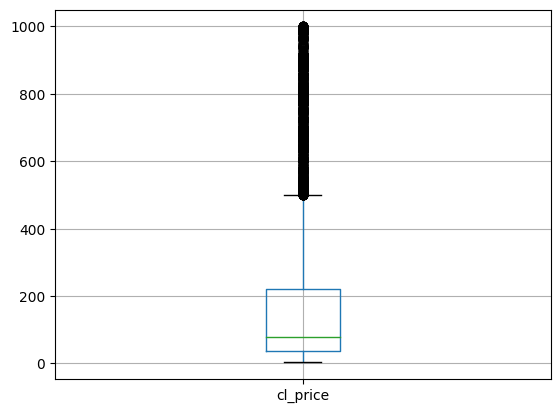

In [207]:
products_2sp = transform(products_1sp,'price','cl_price').dropna().copy()

(
products_2sp.cl_price.describe()
,products_2sp[products_2sp.cl_price < 1000].boxplot('cl_price')
)

####`promo_price`

In [209]:
products_2sp.promo_price

0        499.899
1        589.996
2        569.898
3        229.997
4          31.99
          ...   
19321    269.903
19322    649.903
19323    649.903
19324    649.903
19325    649.903
Name: promo_price, Length: 10476, dtype: object

In [235]:
# Investigate the cases
analyze_prices(products_1sp, "promo_price")

CASE 1: \d{1,3}\.\d{3}\.\d{3}
False   0.57
True    0.43
Name: promo_price, dtype: float64
CASE 2: \d{3}\.\d{3}
False   0.56
True    0.44
Name: promo_price, dtype: float64
CASE 3: \d{1,4}\.\d{1,3}
True    0.55
False   0.45
Name: promo_price, dtype: float64
CASE 4: \d{1,5}
False   0.99
True    0.01
Name: promo_price, dtype: float64
CASE Na
False   1.00
Name: promo_price, dtype: float64


Compair to `price` `probo_price` seems to be strongy corrupted.
* 43% with X.xxx.xxx  
* 44% with xxx.xxx 

(count   10476.00
 mean      255.55
 std       299.21
 min         2.31
 25%        49.89
 50%       169.90
 75%       369.90
 max      9841.99
 Name: cl_promo_price, dtype: float64,
 <Axes: >)

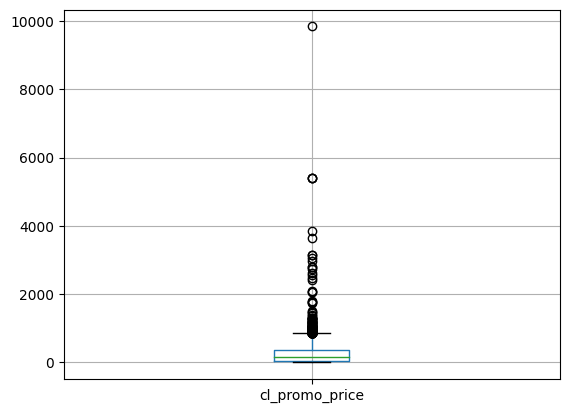

In [241]:
#Only testing the function
products_2sp = transform(products_1sp,'promo_price','cl_promo_price').dropna().copy()

(
products_2sp.cl_promo_price.describe()
,products_2sp[products_2sp.cl_promo_price > 1].boxplot('cl_promo_price')
)

####**`sku`**

In [242]:
products_2sp.sku

0        RAI0007
1        APP0023
2        APP0025
3        APP0072
4        KIN0007
          ...   
19321    BEL0376
19322    THU0060
19323    THU0061
19324    THU0062
19325    THU0063
Name: sku, Length: 10476, dtype: object

In [243]:
len(products_2sp.sku.unique())

10476

In [461]:
products_2sp[products_1sp.sku.str.slice(0,3) == "REP"].sort_values(by="desc").sample(10)

<ipython-input-461-5958a3285ce5>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  products_2sp[products_1sp.sku.str.slice(0,3) == "REP"].sort_values(by="desc").sample(10)


,sku,name,desc,price,promo_price,in_stock,type,cl_price,cl_promo_price,brands
15472,REP0355,Repair iPad Air Headphone Input,Repair service including parts and labor for iPad Air,69.99,699.899,0,"1,44E+11",69.99,699.90,REP
17246,REP0396,Full screen repair iPhone 7 Plus,Repair service including parts and labor for iPhone 7 Plus,119.99,1.199.897,0,"1,44E+11",119.99,12.00,REP
19300,REP0412,Rear Camera Repair iPhone 7 Plus,It is including parts and labor for iPhone 7 Plus,119.99,1.199.897,0,"1,44E+11",119.99,12.00,REP
2405,REP0239,battery repair iPhone 6,Repair service including parts and labor for iPhone 6,59.99,399.893,0,"1,44E+11",59.99,399.89,REP
15355,REP0321,iPhone repair microphone 6s,Repair service including parts and labor for iPhone 6s,6.999.003,69.99,0,"1,44E+11",69.99,69.99,REP
369,REP0036,Full screen repair iPhone 4,Repair service including parts and labor for iPhone 4,49.99,499.899,0,"1,44E+11",49.99,499.90,REP
15364,REP0270,Load Connector Repair iPhone 5,Repair service including parts and labor for iPhone 5,49.99,499.899,0,"1,44E+11",49.99,499.90,REP
944,REP0189,LCD Screen Repair iPad Mini 2,Repair service including parts and labor for iPad Mini 2,159.999,1.598.991,0,"1,44E+11",160.00,15.99,REP
15436,REP0316,iPhone Home button repair 6s,Repair service including parts and labor for iPhone 6s,69.99,699.899,0,"1,44E+11",69.99,699.90,REP
15389,REP0297,Full screen iPhone repair,Repair service including parts and labor for iPhone,59.99,59.99,0,"1,44E+11",59.99,59.99,REP


In [246]:
products_2sp["brands"] = products_2sp.sku.str.slice(0,3)

products_3sp = (
products_2sp.merge(brands, how="inner", left_on="brands", right_on="short")
[["sku","long", "name", "desc", "price", "promo_price","cl_price","cl_promo_price", "type",]]
.copy()
)

### Comparing, checking for differences

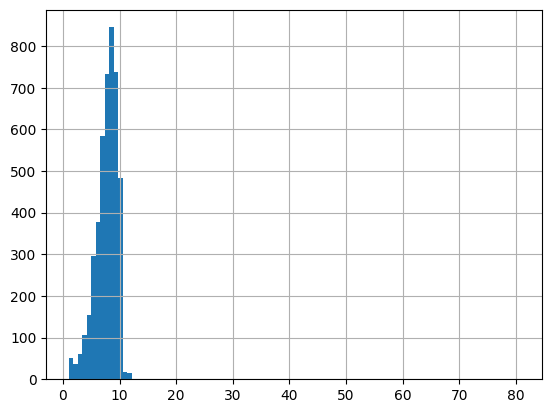

In [256]:
products_3sp['cl_deff'] = products_3sp.cl_price - products_3sp.cl_promo_price
products_3sp['cl_deff_2'] = products_3sp.cl_promo_price/products_3sp.cl_price
products_3sp[["price", "promo_price","cl_price","cl_promo_price","cl_deff","cl_deff_2"]]


products_3sp[products_3sp.cl_deff_2 > 1].cl_deff_2.hist(bins=100);

In [590]:
#Drop columns
#products_3sp = products_3sp.drop(["price","promo_price","cl_deff",'cl_deff_2'], axis=1)
products_3sp = products_3sp.drop(['cl_promo_price'], axis=1)
products_3sp

,sku,long,name,desc,cl_price,type
0,RAI0007,Rain Design,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,8696
1,RAI0014,Rain Design,Rain Design iSlider iPad Support,Anodized aluminum support multiposition iPad and iPad mini.,49.99,1216
2,RAI0015,Rain Design,Rain Design MTower support MacBook Air / Pro,Aluminum support for MacBook Pro and MacBook Air,59.99,8696
3,RAI0016,Rain Design,Rain Design iLevel2 MacBook Support,Adjustable aluminum bracket height compatible with all MacBook,84.99,8696
4,RAI0018,Rain Design,"Rain Design Mbase Support for iMac 27 """,Minimalist support lifting drawer iMac 27,84.99,8696
...,...,...,...,...,...,...
10262,RYV0009,Ryval,Ryval Base Magnetic Qi Wireless Charging Office,Wireless charging base Ryval magnetic and Qi technology ideal for iPhone X / 8Plus / 8 at home and in the office,49.99,5399
10263,RYV0010,Ryval,Ryval magnetic Qi Wireless Car Charger,Ryval magnetic car charger and Qi Wireless technology is ideal for iPhone X / 8Plus / 8,49.99,5399
10264,MTF0008,Mistify,Mistify Clean Screens Natural 500ml.,Spray cleaning screens and keyboards.,14.99,12085400
10265,SDE0007,SDesign,SDesign iPhone charging dock QI X / 8 / Apple Watch (75-10W),Base load compatible with iPhone and Apple Watch supports multiload,69.99,5399


### Status
`promo_price` not OK

`type, name, desc, price`
keep, no cleaning required

Last Version: `products_3sp` 

# 2 Brands [ok]

**brands.csv**
* `short` – the 3-character code by which the brand can be identified in the first 3 characters of products.sku
* `long` – brand name

In [120]:
brands.sample(10)

,short,long
100,MYF,MyFox
110,NOM,Nomad
57,IFR,iFrogz
133,QNA,QNAP
185,ZAG,ZaggKeys
139,SAM,Samsung
11,BEZ,Be.ez
163,THU,Thule
150,SPE,Spek SeeThru
31,DRO,Drobo


In [121]:
brands.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   short   187 non-null    object
 1   long    187 non-null    object
dtypes: object(2)
memory usage: 3.0+ KB


### Status

All datatype are OK

Last Version: `brands` 

# 3 Orders [ok]


**orders.csv** – Every row in this file represents an order.
* `order_id` – a unique identifier for each order
* `created_date` – a timestamp for when the order was created
* `total_paid` – the total amount paid by the customer for this order, in euros
state 
 * “Shopping basket” – products have been placed in the shopping basket, but the order has not been processed yet.
 * “Pending” – the shopping basket has been processed, but payment confirmation is pending.
 * “Completed” – the order has been placed and paid, and the transaction is completed.
 * “Cancelled” – the order has been cancelled and the payment returned to the 
customer.

In [122]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226909 entries, 0 to 226908
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      226909 non-null  int64  
 1   created_date  226909 non-null  object 
 2   total_paid    226904 non-null  float64
 3   state         226909 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 6.9+ MB


In [123]:
orders.sample(5)

,order_id,created_date,total_paid,state
148488,448621,2017-11-27 16:01:56,366.99,Place Order
86662,386237,2017-08-04 17:17:33,359.99,Shopping Basket
168685,469042,2017-12-21 20:52:10,13.49,Shopping Basket
115248,414834,2017-10-20 09:13:54,0.00,Place Order
225418,525910,2018-03-12 13:14:36,99.99,Place Order


In [124]:
orders.nunique()

order_id        226909
created_date    224828
total_paid       31236
state                5
dtype: int64

In [125]:
len(orders.order_id.unique())

226909

All `order_is` are unique.

In [452]:
#orders_1sp = orders.drop_na.copy()
orders_1sp["created_date"] = pd.to_datetime(orders.created_date)

In [127]:
orders_1sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226909 entries, 0 to 226908
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_id      226909 non-null  int64         
 1   created_date  226909 non-null  datetime64[ns]
 2   total_paid    226904 non-null  float64       
 3   state         226909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.9+ MB


In [275]:
orders_2sp_comp.sample(5)

24809     22.98
126802   279.30
184821    47.98
13806     52.98
91538     53.98
Name: total_paid, dtype: float64

In [564]:
orders_2sp_comp = orders_1sp[orders_1sp.state == "Completed"].dropna().copy()

In [565]:
orders_2sp_comp

,order_id,created_date,total_paid,state
1,241423,2017-11-06 13:10:02,136.15,Completed
2,242832,2017-12-31 17:40:03,15.76,Completed
3,243330,2017-02-16 10:59:38,84.98,Completed
5,245275,2017-06-28 11:35:37,149.00,Completed
6,245595,2017-01-21 12:52:47,112.97,Completed
...,...,...,...,...
226549,527042,2018-03-14 11:47:50,18.98,Completed
226577,527070,2018-03-14 11:50:48,24.97,Completed
226581,527074,2018-03-14 11:51:42,24.97,Completed
226603,527096,2018-03-14 11:58:40,34.96,Completed


### Status
All datatype are OK
Pricerange is not OK

Last Version: `orders_2sp_comp` 

#4 Orderlines [non ok]

**orderlines.csv** – Every row represents each one of the different products involved in an order.
* `id` – a unique identifier for each row in this file
* `id_order` – corresponds to orders.order_id
* `product_id` – an old identifier for each product, nowadays not in use
* `product_quantity` – how many units of that product were purchased on that order
* `sku` – stock keeping unit: a unique identifier for each product
* `unit_price` – the unitary price (in euros) of each product at the moment of placing that order
date 
* `timestamp` for the processing of that product

In [130]:
orderlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293983 entries, 0 to 293982
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                293983 non-null  int64 
 1   id_order          293983 non-null  int64 
 2   product_id        293983 non-null  int64 
 3   product_quantity  293983 non-null  int64 
 4   sku               293983 non-null  object
 5   unit_price        293983 non-null  object
 6   date              293983 non-null  object
dtypes: int64(4), object(3)
memory usage: 15.7+ MB


###`unti_price` analyses

In [260]:
analyze_prices(orderlines,'unit_price')

CASE 1: \d{1,3}\.\d{3}\.\d{3}
False   1.00
Name: unit_price, dtype: float64
CASE 2: \d{3}\.\d{3}
False   1.00
Name: unit_price, dtype: float64
CASE 3: \d{1,4}\.\d{1,3}
True    0.88
False   0.12
Name: unit_price, dtype: float64
CASE 4: \d{1,5}
False   1.00
Name: unit_price, dtype: float64
CASE Na
False   1.00
Name: unit_price, dtype: float64


In [341]:
orderlines.unit_price.str.match(r'^\d+\.\d+\.\d+$').value_counts(normalize=True)
orderlines.unit_price.str.count(".").value_counts(normalize=True)
((orderlines.unit_price.str.endswith("0")) | (orderlines.unit_price.str.endswith("9"))).value_counts(normalize=True)

True    0.87
False   0.13
Name: unit_price, dtype: float64

In [353]:
orderlines[orderlines.unit_price.str.match(r'^\d+\.\d+\.\d{2}$')].sample(5)
orderlines[orderlines.unit_price.str.match(r'^\d{3}\.\d{2}$')].sample(5)

,id,id_order,product_id,product_quantity,sku,unit_price,date
173373,1456498,447571,0,1,NEA0014,149.99,2017-11-27 11:08:36
161630,1436796,438934,0,1,WAC0132,167.99,2017-11-24 12:55:09
108537,1325272,392986,0,1,OWC0177-A,437.14,2017-08-27 03:06:53
114475,1348215,397961,0,1,AP20311,320.33,2017-09-08 18:05:10
176438,1462027,449888,0,1,APP2479,777.17,2017-11-27 23:18:41


In [362]:
orderlines[orderlines.unit_price.str.count(".") > 4].sample(5)

,id,id_order,product_id,product_quantity,sku,unit_price,date,cl_unit_price
7669,1139353,306578,0,1,RAI0015,46.99,2017-01-10 16:18:20,46.99
170441,1451336,445271,0,1,MIC0036,64.39,2017-11-26 14:18:24,64.39
267935,1608254,509113,0,1,ZAG0036,19.99,2018-02-10 05:34:07,19.99
91012,1293395,376505,0,1,EVU0007,29.99,2017-07-15 01:43:11,29.99
48303,1218411,341484,0,1,APP1942,2.174.99,2017-04-01 05:05:05,2174.99


In [360]:
orderlines_1sp = transform_OL(orderlines,"unit_price","cl_unit_price").copy()

In [131]:
orderlines[orderlines['id_order'] == 461458], orders_1sp[orders_1sp['order_id'] == 461458]

(             id  id_order  product_id  product_quantity      sku unit_price  \
 199773  1492821    461458           0                 1  MIN0011      13.99   
 
                        date  
 199773  2017-12-13 07:37:44  ,
         order_id        created_date  total_paid            state
 161200    461458 2017-12-13 07:37:44       13.99  Shopping Basket)

* `orders`:`created_date` is the same as `orderlines`:`date`
 
* `orders`:`order_id` is the same as `orderlines`:`id_order`






In [364]:
orderlines_2sp = orderlines_1sp.copy()
orderlines_2sp["date"] = pd.to_datetime(orderlines.date)
orderlines_2sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293983 entries, 0 to 293982
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                293983 non-null  int64         
 1   id_order          293983 non-null  int64         
 2   product_id        293983 non-null  int64         
 3   product_quantity  293983 non-null  int64         
 4   sku               293983 non-null  object        
 5   unit_price        293983 non-null  object        
 6   date              293983 non-null  datetime64[ns]
 7   cl_unit_price     293982 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 17.9+ MB


In [367]:
orderlines_2sp[orderlines_2sp.product_quantity ==2]
orderlines_2sp["sum_price"] = orderlines_1sp.product_quantity * orderlines_1sp.cl_unit_price
orderlines_2sp

,id,id_order,product_id,product_quantity,sku,unit_price,date,cl_unit_price,sum_price
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19,18.99,18.99
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45,399.00,399.00
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57,474.05,474.05
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40,68.39,68.39
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38,23.74,23.74
...,...,...,...,...,...,...,...,...,...
293978,1650199,527398,0,1,JBL0122,42.99,2018-03-14 13:57:25,42.99,42.99
293979,1650200,527399,0,1,PAC0653,141.58,2018-03-14 13:57:34,141.58,141.58
293980,1650201,527400,0,2,APP0698,9.99,2018-03-14 13:57:41,9.99,19.98
293981,1650202,527388,0,1,BEZ0204,19.99,2018-03-14 13:58:01,19.99,19.99


In [388]:
#Drop columns
orderlines_2sp = orderlines_2sp.drop(['unit_price'], axis=1)
orderlines_2sp

,id,id_order,product_id,product_quantity,sku,date,cl_unit_price,sum_price
0,1119109,299539,0,1,OTT0133,2017-01-01 00:07:19,18.99,18.99
1,1119110,299540,0,1,LGE0043,2017-01-01 00:19:45,399.00,399.00
2,1119111,299541,0,1,PAR0071,2017-01-01 00:20:57,474.05,474.05
3,1119112,299542,0,1,WDT0315,2017-01-01 00:51:40,68.39,68.39
4,1119113,299543,0,1,JBL0104,2017-01-01 01:06:38,23.74,23.74
...,...,...,...,...,...,...,...,...
293978,1650199,527398,0,1,JBL0122,2018-03-14 13:57:25,42.99,42.99
293979,1650200,527399,0,1,PAC0653,2018-03-14 13:57:34,141.58,141.58
293980,1650201,527400,0,2,APP0698,2018-03-14 13:57:41,9.99,19.98
293981,1650202,527388,0,1,BEZ0204,2018-03-14 13:58:01,19.99,19.99


In [376]:
orderlines_2sp.id_order.nunique()

204855

Different ammount of unique `id_order`

Orders: 226909
Orderlines: 204855

In [377]:
orderlines_2sp.query('product_quantity == 1').id_order.nunique()

194780

In [378]:
orderlines_2sp.query('product_quantity != 1').id_order.nunique()

14734

REP is not in Orderlines

In [375]:
orderlines_2sp.sku.isin(["REP"]).sum() 

0

### Status
All OK 

Last Version `orderlines_2sp`

# Combine Tables

The `products` table should be the primary reference for all the products being sold. It is likely that, during the Data Cleaning phase, you deleted many rows from `products`. Any order involving products not present there is susceptible to containing corrupted information.

You might choose to deal with this in many different ways, but a conservative one would be to delete all of the potentially corrupted rows. 

Exclude orders with unknown products.

`orderlines.sku` are in `produts.sku`. If `sku` not in `products` remove it from `orderlines.order_id` and from `orders`.  If no it will affect the Orders. 


### All clean Tables

In [531]:
orderlines_2sp.head(1).sort_values(by="id_order")

,id,id_order,product_id,product_quantity,sku,date,cl_unit_price,sum_price
0,1119109,299539,0,1,OTT0133,2017-01-01 00:07:19,18.99,18.99


In [412]:
products_3sp.sample(1)

,sku,long,name,desc,cl_price,cl_promo_price,type
7908,SAM0115,Samsung,Samsung EVO SSD 750 500 GB,SSD Hard Drive SATA 6 Gb / s 25-inch NAND technology for Mac and PC.,149.99,15.36,12215397


In [566]:
orders_2sp_comp.sample(1)

,order_id,created_date,total_paid,state
58472,358009,2017-07-24 17:45:07,2029.49,Completed


In [478]:
orderlines_in_prod = orderlines_2sp.merge(
    products_3sp,
    how = "left",
    left_on = 'sku',
    right_on = 'sku'
)

len(set(orderlines_in_prod.sku)), len(set(orderlines_2sp.sku))

(7951, 7951)

In [479]:
orderlines_in_prod.isna().sum() #NA from products

id                     0
id_order               0
product_id             0
product_quantity       0
sku                    0
date                   0
cl_unit_price          1
sum_price              1
long                2031
name                2031
desc                2031
cl_price            2031
cl_promo_price      2031
type                2031
dtype: int64

This `ska` and `id_order` are not in `produkts`.

In [488]:
orderlines_in_prod[orderlines_in_prod['type'].isna()] 

,id,id_order,product_id,product_quantity,sku,date,cl_unit_price,sum_price,long,name,desc,cl_price,cl_promo_price,type
117,1119316,299638,0,1,SYN0127,2017-01-01 11:56:18,223.24,223.24,NaN,NaN,NaN,NaN,NaN,NaN
192,1119477,299706,0,1,EVU0007,2017-01-01 13:57:16,28.49,28.49,NaN,NaN,NaN,NaN,NaN,NaN
198,1119494,299712,0,1,APP0608,2017-01-01 14:10:47,279.99,279.99,NaN,NaN,NaN,NaN,NaN,NaN
253,1119584,299766,0,1,APP0607,2017-01-01 16:09:02,279.99,279.99,NaN,NaN,NaN,NaN,NaN,NaN
285,1119637,299799,0,1,APP0608,2017-01-01 17:09:18,279.99,279.99,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291957,1646559,525670,0,1,DOD0010,2018-03-11 22:54:41,21.99,21.99,NaN,NaN,NaN,NaN,NaN,NaN
292161,1646897,523315,0,1,LUM0008,2018-03-12 11:07:33,59.99,59.99,NaN,NaN,NaN,NaN,NaN,NaN
292194,1646975,525863,0,1,UBT0009,2018-03-12 12:03:31,159.95,159.95,NaN,NaN,NaN,NaN,NaN,NaN
292356,1647280,526003,0,1,NET0028,2018-03-12 15:59:19,404.99,404.99,NaN,NaN,NaN,NaN,NaN,NaN


In [496]:
drop_ids = list(orderlines_in_prod[orderlines_in_prod['type'].isna()].id_order.drop_duplicates())

Remove no corresponding `id_orders` from `orderlines`

In [542]:
orderlines_3sp = orderlines_2sp.set_index("id_order").drop(drop_ids, axis=0).reset_index().copy()

In [561]:
orderlines_2sp.shape, orderlines_3sp.shape

((293983, 8), (289669, 8))

Remove no corresponding `order_id` from `orders`


In [583]:
# Convert drop_ids to a set for faster membership checking
drop_ids_set = set(drop_ids)

# Filter rows with existing index values
orders_3sp_comp = orders_2sp_comp.set_index("order_id").loc[lambda x: x.index.isin(drop_ids_set) == False].reset_index()
orders_3sp_comp

,order_id,created_date,total_paid,state
0,241423,2017-11-06 13:10:02,136.15,Completed
1,242832,2017-12-31 17:40:03,15.76,Completed
2,243330,2017-02-16 10:59:38,84.98,Completed
3,245275,2017-06-28 11:35:37,149.00,Completed
4,245595,2017-01-21 12:52:47,112.97,Completed
...,...,...,...,...
46157,527042,2018-03-14 11:47:50,18.98,Completed
46158,527070,2018-03-14 11:50:48,24.97,Completed
46159,527074,2018-03-14 11:51:42,24.97,Completed
46160,527096,2018-03-14 11:58:40,34.96,Completed


# Big table

In [592]:
all_commbine = (
orders_3sp_comp
 .merge(
    orderlines_1sp, 
    how = "inner", 
    left_on ="order_id", 
    right_on ="id_order")
 .merge(
    products_3sp, 
    how = "inner",
    left_on = "sku",
    right_on = "sku")
 .copy()
)

all_commbine.sample(10)

,order_id,created_date,total_paid,state,id,id_order,product_id,product_quantity,sku,unit_price,date,cl_unit_price,long,name,desc,cl_price,type
47585,514710,2018-02-20 13:38:03,1674.99,Completed,1621035,514710,0,1,APP2080,1.668.00,2018-02-20 11:15:41,1668.00,Apple,"Apple MacBook Pro 13 ""Core i5 23GHz | 8GB RAM | 256GB PCIe SSD | Space Gray",New MacBook Pro 13-inch Core i5 23GHz with 8GB of RAM and 256GB PCIe SSD,1755.59,"1,02E+12"
44951,471286,2017-12-25 18:00:41,146.98,Completed,1514600,471286,0,1,JBL0112,139.99,2017-12-25 17:56:36,139.99,JBL,Charge 3 JBL Bluetooth Portable Speaker Black,Bluetooth portable speaker waterproof for iPhone iPad and iPod.,169.99,5398
14547,315083,2017-01-26 11:45:24,83.98,Completed,1159900,315083,0,1,TRA0010,79.99,2017-01-26 11:43:27,79.99,Trascend,"Transcend JetDrive Lite 130 128GB Macbook Air 13 """,MLC memory card 128 GB macbook 13 inches.,90.00,57445397
42771,406779,2017-09-30 21:35:47,46.98,Completed,1366329,406779,0,1,APP1679,33.00,2017-09-30 21:21:19,33.00,Apple,Apple iPhone Silicone Case Cover Red 8/7,Ultrathin silicone case and microfiber premium for iPhone 8/7,39.00,11865403
11226,430166,2017-11-21 12:42:32,44.97,Completed,1418302,430166,0,1,APP0697,6.99,2017-11-21 12:33:31,6.99,Apple,OEM USB Cable for iPhone iPad Dock and Apple iPod White Compatible,Cable OEM dock for iPhone iPad and iPod compatible USB Apple (unboxed),25.00,1230
28380,349359,2017-04-24 20:19:39,120.97,Completed,1234621,349359,0,1,IFX0042,6.99,2017-04-24 20:05:41,6.99,iFixit,iFixit rubber Kit for MacBook and MacBook Pro Unibody,Kit rubber to the bottom of Macbook / MacBook Pro Unibody.,6.99,14305406
17149,455776,2017-12-07 22:00:15,2461.96,Completed,1482403,455776,0,1,SAT0054,79.99,2017-12-07 21:50:15,79.99,Satechi,Satechi Hub Multiport USB-C 4K HDMI Space Gray,Aluminum adapter with USB Type-C HDMI 4K three ports USB Type-A Ethernet input and SD card reader micro SD for Mac and PC.,89.99,12585395
50806,410576,2017-10-09 18:07:03,156.98,Completed,1374165,410576,0,1,HOW0007,149.99,2017-10-09 18:01:21,149.99,Honeywell,Smart Thermostat Honeywell T6 Lyric Wall,Intelligent wall mounting programmable thermostat (wired) Wi-Fi geolocation iPhone and iPad and Apple Watch,199.99,11905404
50312,390845,2017-08-20 10:29:42,24.98,Completed,1320883,390845,0,1,XDO0043,19.99,2017-08-20 10:18:42,19.99,X-Doria,X-Doria Defense Edge Apple 42mm Watch Case Black / Lima,Anti-shock housing for Apple Watch.,29.99,2434
34598,491087,2018-01-15 16:57:39,69.27,Completed,1561962,491087,0,1,NTE0056,17.99,2018-01-15 16:21:22,17.99,NewerTech,NewerTech Complete set of 14 tools,portable kit of 14 tools for Mac and PC.,23.99,14305406


In [595]:
(
all_commbine[(all_commbine.product_quantity == 1)
           & (all_commbine.state == "Completed")
           & (all_commbine.total_paid > 100) 
           & (all_commbine.total_paid < 100000) ]
            [["total_paid", 
              "product_quantity",
              'cl_unit_price',
              'cl_price']]
              .sort_values(by="total_paid")
              .drop_duplicates()
)

,total_paid,product_quantity,cl_unit_price,cl_price
12773,100.15,1,80.16,107.98
55545,100.15,1,80.16,129.90
32364,100.19,1,95.20,124.99
35809,100.24,1,93.25,105.00
10239,100.26,1,17.99,29.99
...,...,...,...,...
31776,9987.76,1,429.00,429.00
19046,9987.76,1,63.20,79.00
41421,9987.76,1,1112.99,1159.00
47294,10586.97,1,2713.59,2849.00


# Save tables

In [607]:
from google.colab import files

orders_3sp_comp.to_csv("orders_cl.csv", index=False)
files.download("orders_cl.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [605]:
orderlines_3sp.to_csv("orderslines_cl.csv", index=False)
files.download("orderslines_cl.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [606]:
products_3sp.to_csv("products_cl.csv", index=False)
files.download("products_cl.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>